<a href="https://colab.research.google.com/github/laumr/data-science/blob/main/Regresion_logistica_Laura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold


In [ ]:
def to_binary(X_train_, X_test_, cats):
  X_train =  X_train_.copy()
  X_test = X_test_.copy()
  ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
  # train
  X_train_bin = pd.DataFrame(ohe.fit_transform(
      X_train[cats]).toarray(),
      columns = ohe.get_feature_names_out(),
      index = X_train.index)
  X_train_bin = X_train_bin.join(X_train[list(set(X_train.columns)  - set(cats))])
  # test
  X_test_bin = pd.DataFrame(ohe.transform(X_test[cats]).toarray(),
      columns = ohe.get_feature_names_out(),
      index = X_test.index)
  X_test_bin = X_test_bin.join(X_test[list(set(X_test.columns)  - set(cats))])
  X_test_bin = X_test_bin[X_train_bin.columns]
  return X_train_bin, X_test_bin

def scaler(X_train_, X_test_, nums):
  X_train = X_train_.copy()
  X_test = X_test_.copy()
  scaler = StandardScaler()
  # Train
  X_train_scaled = pd.DataFrame(
             scaler.fit_transform(X_train[nums]),
             columns=scaler.get_feature_names_out(),
             index = X_train.index)
  X_train_scaled = X_train_scaled.join(X_train[list(set(X_train.columns)  - set(nums))])
  # Test
  X_test_scaled = pd.DataFrame(
      scaler.transform(X_test[nums]),
      columns = scaler.get_feature_names_out(),
      index = X_test.index)
  X_test_scaled = X_test_scaled.join(X_test[list(set(X_test.columns)  - set(nums))])
  X_test_scaled = X_test_scaled[X_train_scaled.columns]
  return X_train_scaled, X_test_scaled



In [ ]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
df = pd.read_csv(url,sep=";")

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.isnull().sum() #no hay valores nulos

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df.info() #hay que transformar las categóricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df['pdays'].value_counts() #demasiados 999 o que no han sido contactados cambiar a si han sido contactados o no

,count
pdays,
999,39673
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [ ]:
df['contacted_before'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)#tranformo pdays a contacted before porque de otra forma no daba bien la info

In [ ]:
df['default'].value_counts() #la mayoria son negativos y desconocidos por lo que parece no aportar mucha info

,count
default,
no,32588
unknown,8597
yes,3


In [ ]:
cats = ['job', 'marital', 'education', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome']
for col in cats:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(normalize=True)) #revisar variación en variables categóricas


job value counts:
job
admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: proportion, dtype: float64

marital value counts:
marital
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: proportion, dtype: float64

education value counts:
education
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: proportion, dtype: float64

housing value counts:
housing
yes        0.523842
no         0.452122
unknown    0.024036
Name: proportion, dtype: float64

loan value counts:
loan
no         

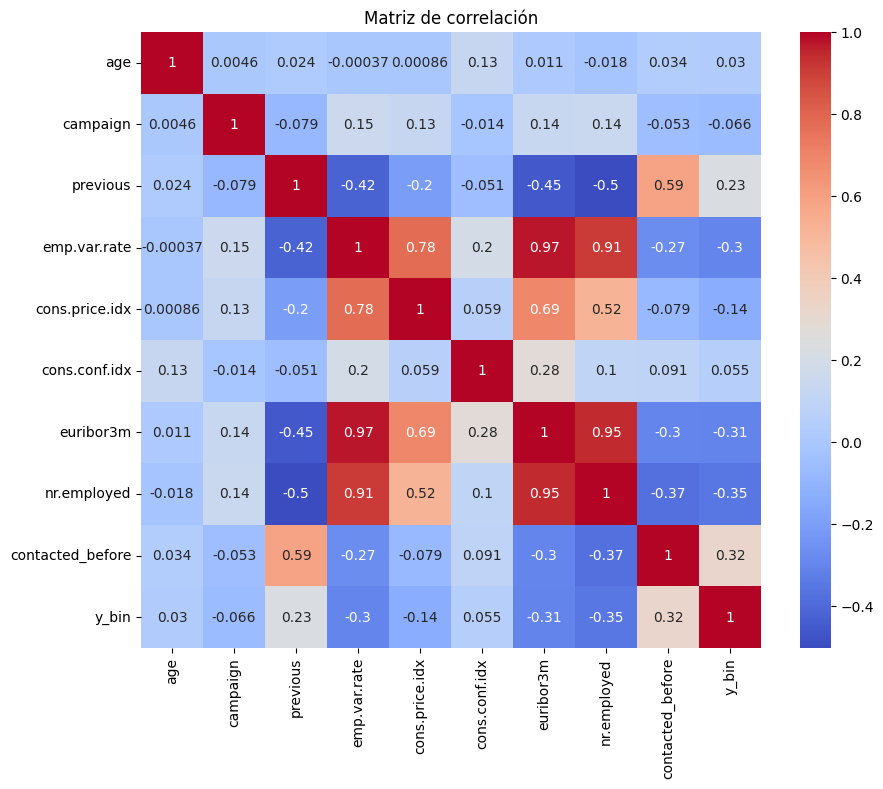

In [ ]:
df['y_bin'] = df['y'].map({'no': 0, 'yes': 1})

num_cols = ['age', 'campaign', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
            'euribor3m', 'nr.employed','contacted_before']

correlation = df[num_cols + ['y_bin']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

#existe multicolinealidad entre nr.employed, euribor3m y emp.var.rate -
#se decide dejar nr.employed porque tiene mayor correlacion absoluta con y

In [ ]:
df.drop(columns=['default','duration','pdays','euribor3m','emp.var.rate'], inplace=True)

In [ ]:
X = df.drop(columns=['y','y_bin'])
y = df['y_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41188 non-null  int64  
 1   job               41188 non-null  object 
 2   marital           41188 non-null  object 
 3   education         41188 non-null  object 
 4   housing           41188 non-null  object 
 5   loan              41188 non-null  object 
 6   contact           41188 non-null  object 
 7   month             41188 non-null  object 
 8   day_of_week       41188 non-null  object 
 9   campaign          41188 non-null  int64  
 10  previous          41188 non-null  int64  
 11  poutcome          41188 non-null  object 
 12  cons.price.idx    41188 non-null  float64
 13  cons.conf.idx     41188 non-null  float64
 14  nr.employed       41188 non-null  float64
 15  contacted_before  41188 non-null  int64  
dtypes: float64(3), int64(4), object(9)
memor

In [ ]:
cats = ['job', 'marital', 'education', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome']
nums = ['age', 'campaign', 'previous', 'cons.price.idx',
        'cons.conf.idx', 'nr.employed']
X_train_bin, X_test_bin = to_binary(X_train, X_test, cats)
X_train_final, X_test_final = scaler(X_train_bin, X_test_bin, nums)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.64      0.22      0.33       935

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.64      8238
weighted avg       0.88      0.90      0.87      8238

(array([0.11349842, 0.63692308, 1.        ]), array([1.        , 0.22139037, 0.        ]), array([0, 1]))


In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7303
           1       0.34      0.61      0.44       935

    accuracy                           0.82      8238
   macro avg       0.64      0.73      0.67      8238
weighted avg       0.88      0.82      0.84      8238



In [ ]:
def logistic_gridcv(X_train, y_train):
    model = LogisticRegression(solver='liblinear', random_state=123, max_iter=1000)
    hyperparams = {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ['l1', 'l2'],
        "class_weight": [None, 'balanced']
    }
    cv = KFold(n_splits=5, shuffle=True, random_state=123)
    grid_search = GridSearchCV(model, param_grid=hyperparams, cv=cv, scoring='f1')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

best_logreg = logistic_gridcv(X_train_final, y_train)
best_logreg

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=123, solver='liblinear')

In [ ]:
y_pred = best_logreg.predict(X_test_final)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7303
           1       0.35      0.59      0.44       935

    accuracy                           0.83      8238
   macro avg       0.65      0.73      0.67      8238
weighted avg       0.88      0.83      0.85      8238

